Trees

In [1]:
'''import nbimporter
import importlib
import Utilitas
from Utilitas import *
importlib.reload(Utilitas)'''

'import nbimporter\nimport importlib\nimport Utilitas\nfrom Utilitas import *\nimportlib.reload(Utilitas)'

In [2]:
import qiskit_metal as qm

In [3]:
from qiskit_metal import designs, draw, MetalGUI, Dict, open_docs
from qiskit_metal.qlibrary.qubits.transmon_pocket import TransmonPocket
from qiskit_metal.qlibrary.tlines.meandered import RouteMeander
from qiskit_metal.qlibrary.tlines.straight_path import RouteStraight
from qiskit_metal.qlibrary.tlines.framed_path import RouteFramed
from qiskit_metal.qlibrary.tlines.mixed_path import RouteMixed
from qiskit_metal.qlibrary.tlines.pathfinder import RoutePathfinder
import numpy as np
from collections import OrderedDict

In [4]:
design = designs.DesignPlanar()
gui = MetalGUI(design)

In [5]:
design.chips.main.size.size_x='5 mm'
design.chips.main.size.size_y='5 mm'

In [6]:
def guidraw(n=1, dlt=False, hlt=False):
    if dlt:
        gui.rebuild()
        gui.screenshot()
    else:
        gui.rebuild()
        gui.autoscale()
        if n==1:
            gui.edit_component(['Q1'])
        gui.zoom_on_components([f'Q{i}' for i in range(1, n+1)])
        if hlt:
            gui.highlight_components([f'Q{i}' for i in range(1, n+1)])
        gui.screenshot()

In [7]:
def clean():
    design.delete_all_components()

In [8]:
def Three_Qubiteers(a='3mm'):
    design.overwrite_enabled = True
    
    options = Dict(
        pad_width = '450 um',
        pocket_height = '650um',
        connection_pads= Dict(
            a = Dict(loc_W= +1, loc_H= +1),
            b = Dict(loc_W= -1, loc_H= +1, pad_height='40um'),
            #c = Dict(loc_W= +1, loc_H= -1, pad_width='200um'),
            #d = Dict(loc_W= -1, loc_H= -1, pad_height='50um'),
        )
    )
    s = int(a[0])
    q1 = TransmonPocket(design, 'Q1', options=Dict(pos_x='+0.00mm', pos_y=str(s*np.sqrt(3)/2) + 'mm', orientation = 180, **options))
    q2 = TransmonPocket(design, 'Q2', options=Dict(pos_x=str(s/2) + 'mm', pos_y='+0.00mm', orientation = 60, **options))
    q3 = TransmonPocket(design, 'Q3', options=Dict(pos_x=str(-s/2) + 'mm', pos_y='+0.00mm', orientation = -60,  **options))
    
    guidraw(n=3, hlt=False)

In [9]:
clean()

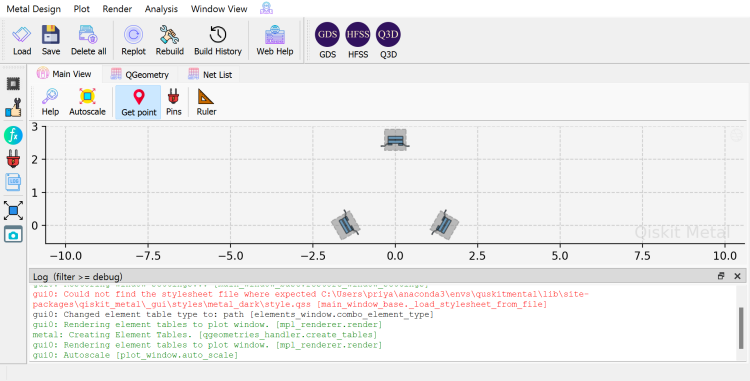

In [10]:
Three_Qubiteers()

In [11]:
def Print_RM_Options():
    opt = RouteMeander.get_template_options(design)
    for i in opt:
        print(i, '-', opt[i])

In [12]:
def Print_RS_Options():
    opt = RouteStraight.get_template_options(design)
    for i in opt:
        print(i, '-', opt[i])

In [13]:
def Print_RMix_Options():
    opt = RouteMixed.get_template_options(design)
    for i in opt:
        print(i, '-', opt[i])

In [14]:
#Print_RM_Options()
Print_RMix_Options()

chip - main
layer - 1
pin_inputs - {'start_pin': {'component': '', 'pin': ''}, 'end_pin': {'component': '', 'pin': ''}}
fillet - 0
lead - {'start_straight': '0mm', 'end_straight': '0mm', 'start_jogged_extension': '', 'end_jogged_extension': ''}
total_length - 7mm
trace_width - cpw_width
meander - {'spacing': '200um', 'asymmetry': '0um'}
snap - true
prevent_short_edges - true
anchors - {}
advanced - {'avoid_collision': 'true'}
step_size - 0.25mm
between_anchors - {}
hfss_wire_bonds - False
q3d_wire_bonds - False


In [15]:
ops = Dict(fillet='90um')

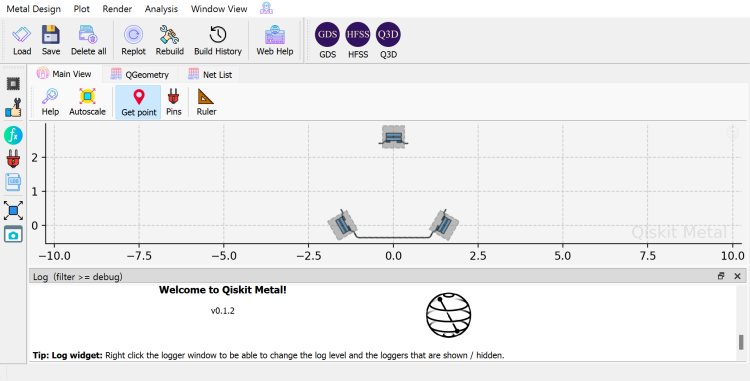

In [16]:
options= Dict(
    total_length = '9mm',
    hfss_wire_bonds = True,
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q2',
            pin = 'b'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin = 'a'
        )
    ),
    lead= Dict(
        start_straight = '0.1mm',
        end_straight = '0.1mm'
    ),
    meander = Dict(asymmetry='-0.0mm'),
    **ops
)

try:
    cpw3.delete()
except NameError: pass

cpw3 = RoutePathfinder(design, options=options)
guidraw(n=3)

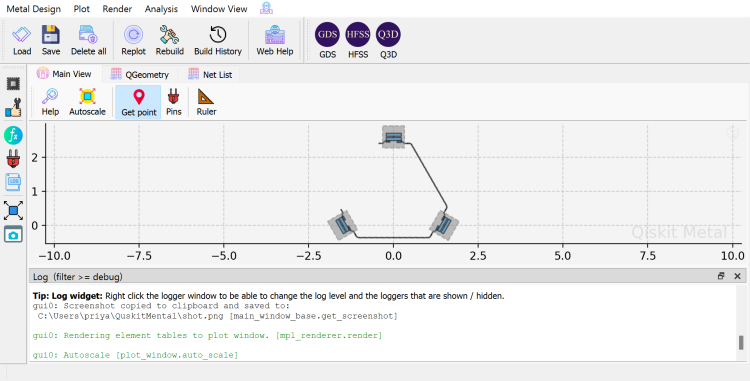

In [17]:
anchors = OrderedDict()
bw_anchors = OrderedDict()

#for x in range(50, 100):
#    y = -np.sqrt(3) * (x/100- 0.42) + 2.4
#    anchors[x-50] = np.array([x/100, y])
#    bw_anchors[x-50] = "S"
#bw_anchors[100-50] = "M"

anchors[0] = np.array([0.71, 1.9])
#anchors[1] = np.array([1, np.sqrt(3)/2])
bw_anchors[0] = "M"
bw_anchors[1] = "M"


options= Dict(
    total_length = '19mm',
    hfss_wire_bonds = True,
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'b'
        ),
        end_pin = Dict(
            component = 'Q2',
            pin = 'a'
        )
    ),
    anchors = anchors,
    between_anchors = bw_anchors,
    advanced = Dict(avoid_collision = 'true'),
    lead= Dict(
        start_straight = '0.09mm',
        end_straight = '0.09mm'
    ),
    meander = Dict(asymmetry='0.0mm'),
    meander_angle= 60,
    **ops
)

try:
    cpw2.delete()
except NameError: pass

cpw2 = RouteStraight(design, options=options)
guidraw(n=3)

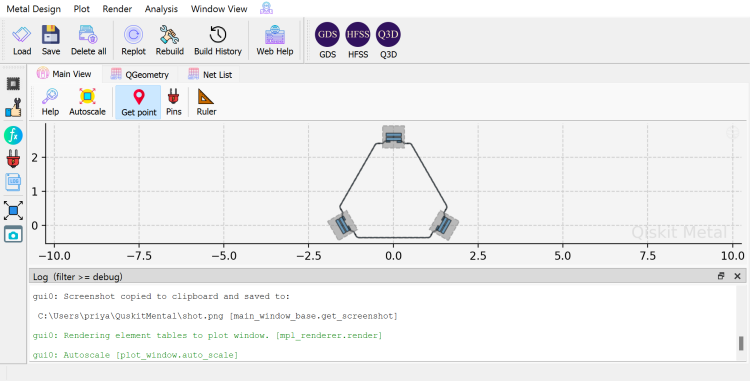

In [18]:
options = Dict(
    total_length = '9mm',
    hfss_wire_bonds = True,
    pin_inputs = Dict(
        start_pin = Dict(
            component = 'Q1',
            pin = 'a'
        ),
        end_pin = Dict(
            component = 'Q3',
            pin=  'b'
        )
    ),
    #anchors = anchors,
    #between_anchors = bw_anchors,
    advanced = Dict(avoid_collision = 'true'),
    lead = Dict(
        start_straight = '0.09mm',
        end_straight = '0.09mm',
        #start_jogged_extension = jogsS,
        #end_jogged_extension = jogsE
    ),
    meander = Dict(
        #spacing= '50um',
        asymmetry = '-0.0mm'
    ),
    **ops
)

try:
    cpw.delete()
except NameError: pass

cpw = RouteStraight(design, options = options)

guidraw(n=3)

In [19]:
#chekcout pathfinder next